In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm_notebook
import numpy as np

In [2]:
orig_db = pd.read_csv('csv/orig_librispeech_dev-clean.csv')


### Jaccard similarity

In [3]:
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))


### Cosine similarity: opzione 1 Sklearn

In [4]:
def get_cosine_sim(*strs): 
    vectors = [t for t in get_vectors(*strs)]
    return cosine_similarity(vectors)
    
def get_vectors(*strs):
    text = [t for t in strs]
    vectorizer = CountVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

### Cosine similarity: opzione 2

In [5]:
import re, math
from collections import Counter

WORD = re.compile(r'\w+')

def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)


### Compute cosine similarity between real text and transcription

In [36]:

# Script parameters
orig_librispeech_path = ['/nas/public/dataset/LibriSpeech/dev-clean']
root_path = '/nas/home/cborrelli/speech_forensics'
transcriber = 'sphinx'




selected_db = pd.DataFrame(columns=orig_db.columns)

sim_list = []
sim2_list = []

for index,row in tqdm_notebook(orig_db.iterrows(), total=len(orig_db.index)):
    
    orig_name = row['path'].split('/')[-1].replace('.flac','')

    real_text_path = row['transcription_path']
    with open(real_text_path) as f:
        content = f.readlines()
    
    real_text = []
    for rr in content:
        splitted = rr.split(' ')
        if splitted[0] == orig_name:
            real_text = ' '.join(splitted[1:])
            break
    real_text = real_text.lower().rstrip()
    
    dataset = row['librispeech_folder']
    reader = str(row['reader'])
    book = str(row['book'])
    trans_name = row['path'].split('/')[-1].replace('.flac','.txt')
    path = os.path.join(root_path,transcriber,dataset,reader,book,trans_name)
    
    with open(os.path.join(root_path,transcriber,dataset,reader,book,trans_name), "r") as text_file:
        transcription = text_file.read()
    
    # Opzione 1
    #sim = get_cosine_sim(transcription, real_transcription)
    
    # Opzione 2
    v1 = text_to_vector(transcription)
    v2 = text_to_vector(real_text)
    sim = get_cosine(v1,v2)
    sim2 = get_jaccard_sim(transcription, real_text)
    
    #print("Cosine similarity: "+str(sim))
    #print("Jaccard similarity: "+str(sim2))
    #print("\n")
    
    sim_list += [sim]
    sim2_list += [sim2]
    
    if sim2 >0.975:
        selected_db = selected_db.append(row, ignore_index = True)

sim_list = np.array(sim_list)
sim2_list = np.array(sim2_list)

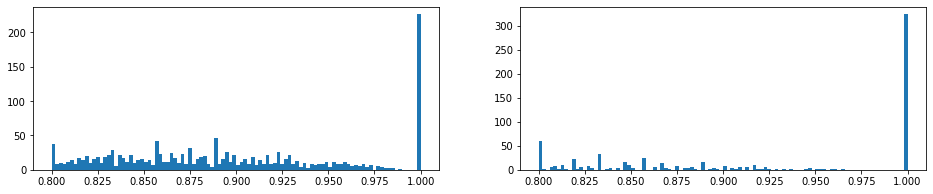

In [35]:
plt.figure(figsize=(16, 3))
plt.subplot(121)
_ = plt.hist(sim_list, 100, range=[0.8, 1], density=False)
plt.subplot(122)
_ = plt.hist(sim2_list, 100, range=[0.8, 1], density=False)

In [37]:
selected_db

,reader,book,librispeech_folder,path,transcription_path,SNR,noise_type
0,2277,149896,dev-clean,/nas/public/dataset/LibriSpeech/dev-clean/2277...,/nas/public/dataset/LibriSpeech/dev-clean/2277...,inf,NaN
1,2277,149896,dev-clean,/nas/public/dataset/LibriSpeech/dev-clean/2277...,/nas/public/dataset/LibriSpeech/dev-clean/2277...,inf,NaN
2,2277,149896,dev-clean,/nas/public/dataset/LibriSpeech/dev-clean/2277...,/nas/public/dataset/LibriSpeech/dev-clean/2277...,inf,NaN
3,2277,149897,dev-clean,/nas/public/dataset/LibriSpeech/dev-clean/2277...,/nas/public/dataset/LibriSpeech/dev-clean/2277...,inf,NaN
4,2277,149897,dev-clean,/nas/public/dataset/LibriSpeech/dev-clean/2277...,/nas/public/dataset/LibriSpeech/dev-clean/2277...,inf,NaN
5,2277,149874,dev-clean,/nas/public/dataset/LibriSpeech/dev-clean/2277...,/nas/public/dataset/LibriSpeech/dev-clean/2277...,inf,NaN
6,2277,149874,dev-clean,/nas/public/dataset/LibriSpeech/dev-clean/2277...,/nas/public/dataset/LibriSpeech/dev-clean/2277...,inf,NaN
7,2277,149874,dev-clean,/nas/public/dataset/LibriSpeech/dev-clean/2277...,/nas/public/dataset/LibriSpeech/dev-clean/2277...,inf,NaN
8,2277,149874,dev-clean,/nas/public/dataset/LibriSpeech/dev-clean/2277...,/nas/public/dataset/LibriSpeech/dev-clean/2277...,inf,NaN
9,2035,147960,dev-clean,/nas/public/dataset/LibriSpeech/dev-clean/2035...,/nas/public/dataset/LibriSpeech/dev-clean/2035...,inf,NaN


In [41]:
for index,row in selected_db.iterrows():
    
    orig_name = row['path'].split('/')[-1].replace('.flac','')

    real_text_path = row['transcription_path']
    with open(real_text_path) as f:
        content = f.readlines()
    
    real_text = []
    for rr in content:
        splitted = rr.split(' ')
        if splitted[0] == orig_name:
            real_text = ' '.join(splitted[1:])
            break
    real_text = real_text.lower().rstrip()
    
    dataset = row['librispeech_folder']
    reader = str(row['reader'])
    book = str(row['book'])
    trans_name = row['path'].split('/')[-1].replace('.flac','.txt')
    path = os.path.join(root_path,transcriber,dataset,reader,book,trans_name)
    
    with open(os.path.join(root_path,transcriber,dataset,reader,book,trans_name), "r") as text_file:
        transcription = text_file.read()
        
    print(real_text)
    print(transcription)
    print('\n')

then he rang the bell no answer
then he rang the bell no answer


how would the papers talk about it
how would the papers talk about it


he would have some arrangement of this thing
he would have some arrangement of this thing


if he only had that letter back he wouldn't send it
if he only had that letter back he wouldn't send it


it seemed as if his family troubles were just beginning
it seemed as if his family troubles were just beginning


he seemed to be thinking of something else
he seemed to be thinking of something else


to him the presence or absence of his wife's sister was a matter of indifference
to him the presence or absence of his wife's sister was a matter of indifference


it was under such auspicious circumstances that she started out this morning to look for work
it was under such auspicious circumstances that she started out this morning to look for work


these vast buildings what were they
these vast buildings what were they


this change came about from an adv

i wish i hadn't taken that brandy he said fool that i am


i have these attacks at times
i have these attacks at times


this is murderous
this is murderous


good night sir i hope you will be comfortable
good night sir i hope you will be comfortable


i'll show you who's master here my good sir
i'll show you who's master here my good sir


it relieved him for a while
it relieved him for a while


george
george


that is we have not been able to find any perhaps you can
that is we have not been able to find any perhaps you can


the lady is not the mother of the boys but their aunt
the lady is not the mother of the boys but their aunt


well well that's honest at all events
well well that's honest at all events


very good manage it as you will
very good manage it as you will


sweetwater help me out of this
sweetwater help me out of this


what does he want
what does he want


yes many times
yes many times


i am looking at him now
i am looking at him now


and she speaks of no weapon

what led me into it was a certain thirst for vengeance which is strong enough to disturb the quietest hearts
what led me into it was a certain thirst for vengeance which is strong enough to disturb the quietest hearts


my arms are right but my legs are getting a little stiff
my arms are right but my legs are getting a little stiff


they were now however absent on duty
they were now however absent on duty


in the meantime there is not an hour to lose
in the meantime there is not an hour to lose


but in the cause of science men are expected to suffer
but in the cause of science men are expected to suffer


well and have we a fair wind
well and have we a fair wind


though not very large it appeared not likely to be filled for centuries
though not very large it appeared not likely to be filled for centuries


the fact was that scarcely any one of them but expected some goods by the periodical vessel
the fact was that scarcely any one of them but expected some goods by the periodical v